In [1]:
import pandas as pd
import numpy as np
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [4]:
pd.set_option('display.max_columns', None)
df

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,Rented,24,0,1,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,Company Owned,47,0,0,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,Company Owned,64,0,0,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,Rented,50,0,0,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,Company Owned,42,1,0,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,WH_124995,EID_74995,Rural,Small,North,Zone 1,3,0,4,5390,Rented,19,0,0,1,142,34.0,2005.0,22,1,A,2,30,32093
24996,WH_124996,EID_74996,Rural,Mid,West,Zone 2,6,0,4,4490,Company Owned,57,0,0,1,130,28.0,2012.0,10,0,B,4,18,12114
24997,WH_124997,EID_74997,Urban,Large,South,Zone 5,7,0,2,5403,Rented,31,1,0,1,147,NaN,NaN,23,0,B+,5,25,27080
24998,WH_124998,EID_74998,Rural,Small,North,Zone 1,1,0,2,10562,Rented,25,0,0,1,60,25.0,NaN,18,0,A,6,30,25093


In [5]:
df.drop(['Ware_house_ID', 'WH_Manager_ID'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [7]:
pd.set_option('display.max_columns', None)
df.describe(include = 'all')

,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,24010.000000,13119.000000,25000.000000,25000.000000,24092,25000.000000,25000.000000,25000.000000
unique,2,3,4,6,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,Rural,Large,North,Zone 6,NaN,NaN,NaN,NaN,Company Owned,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,NaN,NaN,NaN
freq,22957,10169,10278,8339,NaN,NaN,NaN,NaN,13578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5501,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.089040,0.773680,3.104200,4985.711560,NaN,42.418120,0.098160,0.054640,0.656880,163.537320,28.944398,2009.383185,17.130440,0.303280,NaN,3.482040,18.812280,22102.632920
std,NaN,NaN,NaN,NaN,2.606612,1.199449,1.141663,1052.825252,NaN,16.064329,0.297537,0.227281,0.474761,62.718609,7.872534,7.528230,9.161108,0.459684,NaN,1.690335,8.632382,11607.755077
min,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1821.000000,NaN,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,NaN,0.000000,1.000000,2065.000000
25%,NaN,NaN,NaN,NaN,2.000000,0.000000,2.000000,4313.000000,NaN,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,NaN,2.000000,11.000000,13059.000000
50%,NaN,NaN,NaN,NaN,4.000000,0.000000,3.000000,4859.000000,NaN,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,NaN,3.000000,21.000000,22101.000000
75%,NaN,NaN,NaN,NaN,6.000000,1.000000,4.000000,5500.000000,NaN,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,NaN,5.000000,26.000000,30103.000000


In [8]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [9]:
df.isnull().sum().sort_values(ascending = False)/df.index.size

wh_est_year                     0.47524
workers_num                     0.03960
approved_wh_govt_certificate    0.03632
Location_type                   0.00000
WH_capacity_size                0.00000
govt_check_l3m                  0.00000
wh_breakdown_l3m                0.00000
temp_reg_mach                   0.00000
storage_issue_reported_l3m      0.00000
dist_from_hub                   0.00000
electric_supply                 0.00000
flood_proof                     0.00000
flood_impacted                  0.00000
distributor_num                 0.00000
wh_owner_type                   0.00000
retail_shop_num                 0.00000
Competitor_in_mkt               0.00000
transport_issue_l1y             0.00000
num_refill_req_l3m              0.00000
WH_regional_zone                0.00000
zone                            0.00000
product_wg_ton                  0.00000
dtype: float64

In [10]:
df.drop('wh_est_year', axis = 1, inplace = True)

array([[<AxesSubplot:title={'center':'workers_num'}>]], dtype=object)

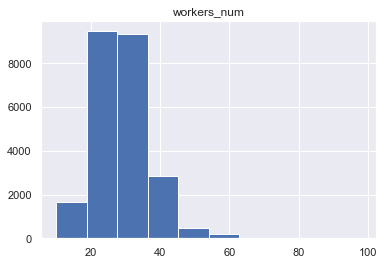

In [11]:
df.hist('workers_num')

In [12]:
df['workers_num'].fillna(df.workers_num.median(), inplace=True)

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=3)

In [15]:
df['approved_wh_govt_certificate'] = df['approved_wh_govt_certificate'].fillna(imputer)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

<AxesSubplot:>

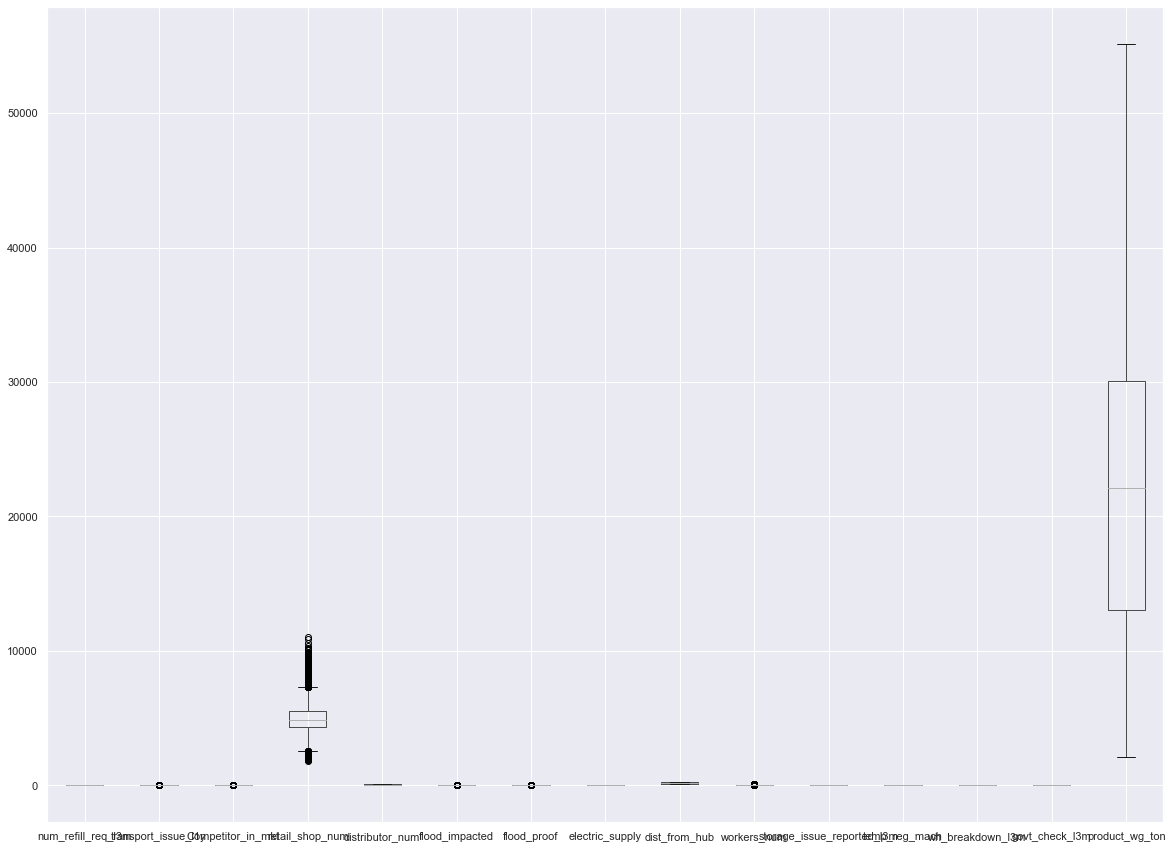

In [17]:
plt.figure(figsize=(20,15))
df.boxplot()

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [19]:
((df > UL) | (df < LL)).sum()

C:\Users\Sumit\AppData\Local\Temp/ipykernel_11700/164218823.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((df > UL) | (df < LL)).sum()


Competitor_in_mkt                 96
Location_type                      0
WH_capacity_size                   0
WH_regional_zone                   0
approved_wh_govt_certificate       0
dist_from_hub                      0
distributor_num                    0
electric_supply                    0
flood_impacted                  2454
flood_proof                     1366
govt_check_l3m                     0
num_refill_req_l3m                 0
product_wg_ton                     0
retail_shop_num                  948
storage_issue_reported_l3m         0
temp_reg_mach                      0
transport_issue_l1y             2943
wh_breakdown_l3m                   0
wh_owner_type                      0
workers_num                      607
zone                               0
dtype: int64

<AxesSubplot:>

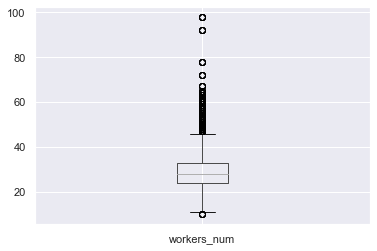

In [20]:
df.boxplot('workers_num')

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

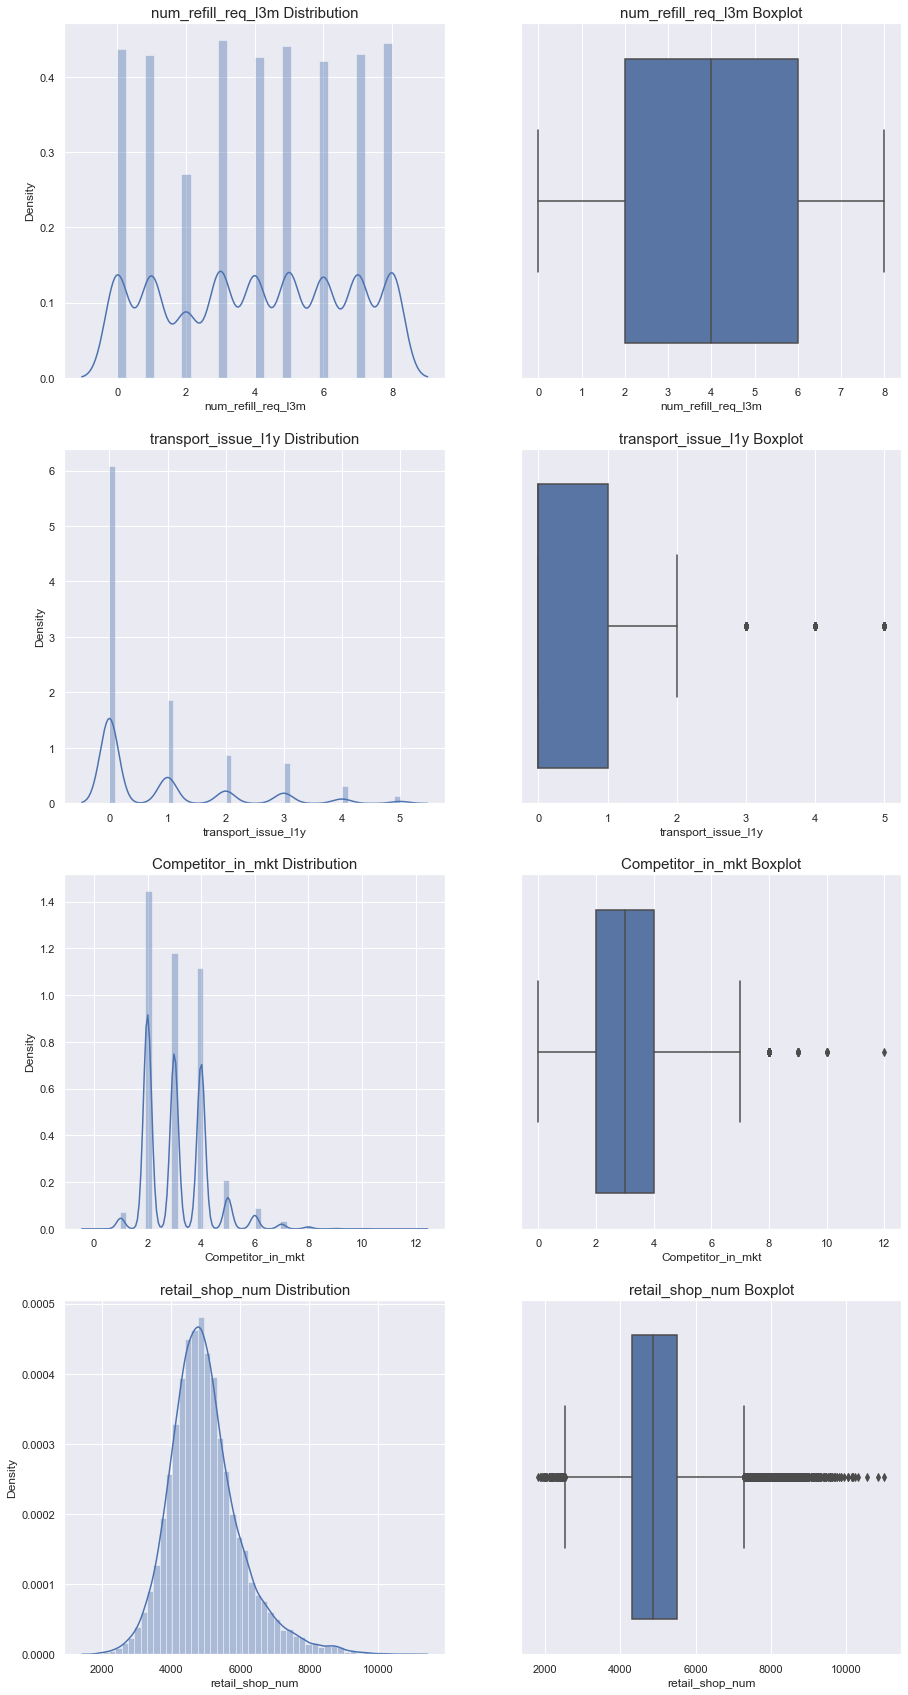

In [21]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15,30)
a = sns.distplot(df['num_refill_req_l3m'] , ax=axes[0][0])
a.set_title("num_refill_req_l3m Distribution",fontsize=15)

a = sns.boxplot(df['num_refill_req_l3m'] , orient = "v" , ax=axes[0][1])
a.set_title("num_refill_req_l3m Boxplot",fontsize=15)

a = sns.distplot(df['transport_issue_l1y'] , ax=axes[1][0])
a.set_title("transport_issue_l1y Distribution",fontsize=15)

a = sns.boxplot(df['transport_issue_l1y'] , orient = "v" , ax=axes[1][1])
a.set_title("transport_issue_l1y Boxplot",fontsize=15)


a = sns.distplot(df['Competitor_in_mkt'] , ax=axes[2][0])
a.set_title("Competitor_in_mkt Distribution",fontsize=15)

a = sns.boxplot(df['Competitor_in_mkt'] , orient = "v" , ax=axes[2][1])
a.set_title("Competitor_in_mkt Boxplot",fontsize=15)


a = sns.distplot(df['retail_shop_num'] , ax=axes[3][0])
a.set_title("retail_shop_num Distribution",fontsize=15)

a = sns.boxplot(df['retail_shop_num'] , orient = "v" , ax=axes[3][1])
a.set_title("retail_shop_num Boxplot",fontsize=15)

plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

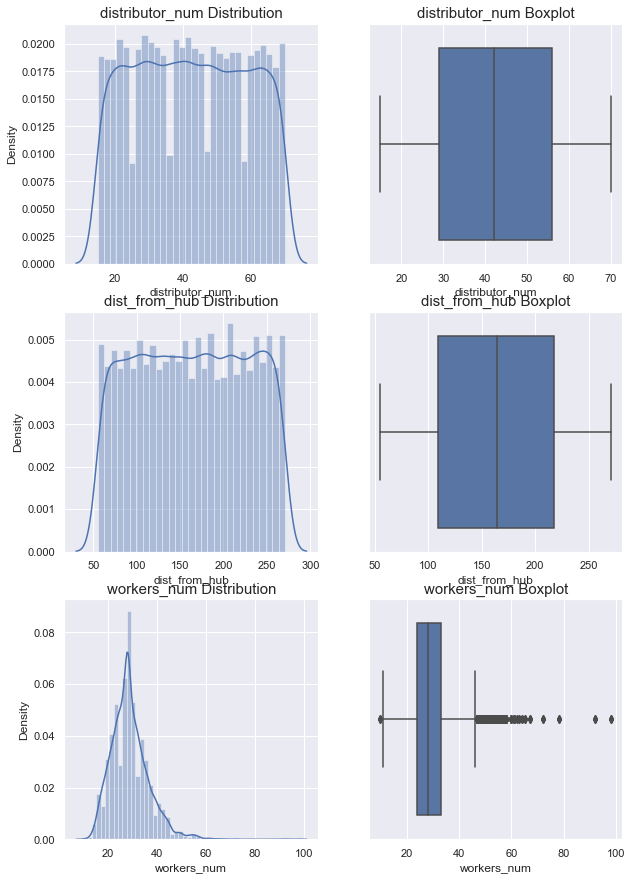

In [22]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,15)

a = sns.distplot(df['distributor_num'] , ax=axes[0][0])
a.set_title("distributor_num Distribution",fontsize=15)

a = sns.boxplot(df['distributor_num'] , orient = "v" , ax=axes[0][1])
a.set_title("distributor_num Boxplot",fontsize=15)


a = sns.distplot(df['dist_from_hub'] , ax=axes[1][0])
a.set_title('dist_from_hub Distribution',fontsize=15)

a = sns.boxplot(df['dist_from_hub'] , orient = "v" , ax=axes[1][1])
a.set_title("dist_from_hub Boxplot",fontsize=15)


a = sns.distplot(df['workers_num'] , ax=axes[2][0])
a.set_title("workers_num Distribution",fontsize=15)

a = sns.boxplot(df['workers_num'] , orient = "v" , ax=axes[2][1])
a.set_title("workers_num Boxplot",fontsize=15)

plt.show();

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and 

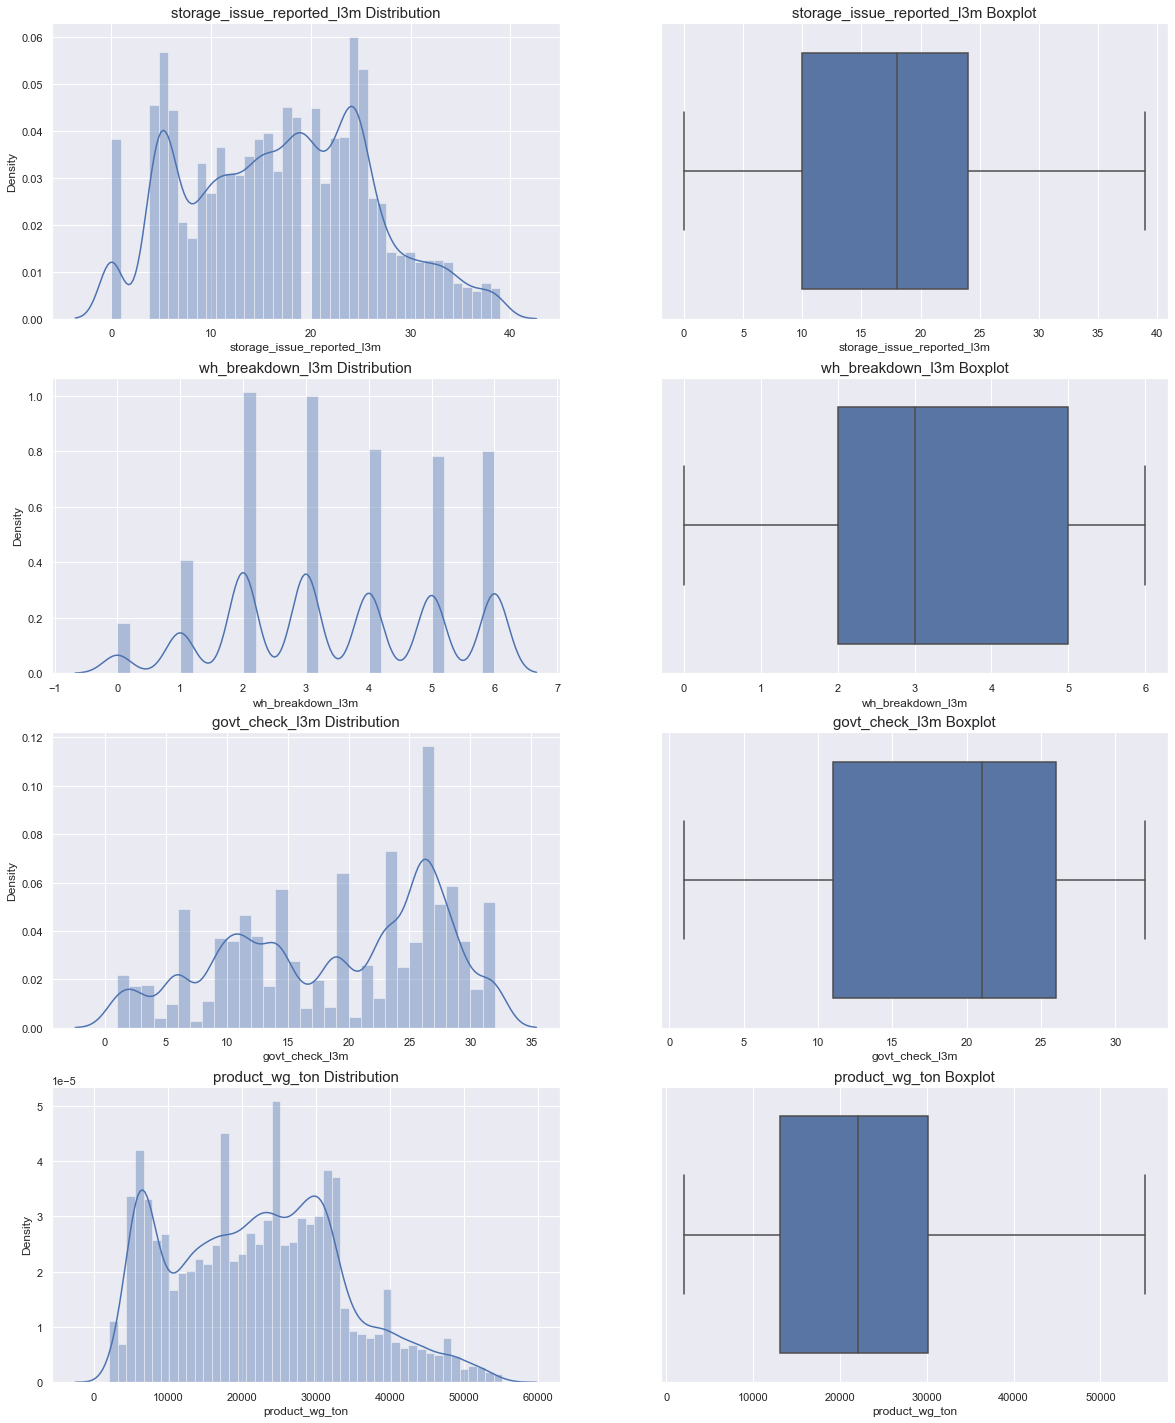

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(20,25)

a = sns.distplot(df['storage_issue_reported_l3m'] , ax=axes[0][0])
a.set_title("storage_issue_reported_l3m Distribution",fontsize=15)

a = sns.boxplot(df['storage_issue_reported_l3m'] , orient = "v" , ax=axes[0][1])
a.set_title("storage_issue_reported_l3m Boxplot",fontsize=15)


a = sns.distplot(df['wh_breakdown_l3m'] , ax=axes[1][0])
a.set_title('wh_breakdown_l3m Distribution',fontsize=15)

a = sns.boxplot(df['wh_breakdown_l3m'] , orient = "v" , ax=axes[1][1])
a.set_title("wh_breakdown_l3m Boxplot",fontsize=15)


a = sns.distplot(df['govt_check_l3m'] , ax=axes[2][0])
a.set_title("govt_check_l3m Distribution",fontsize=15)

a = sns.boxplot(df['govt_check_l3m'] , orient = "v" , ax=axes[2][1])
a.set_title("govt_check_l3m Boxplot",fontsize=15)

a = sns.distplot(df['product_wg_ton'] , ax=axes[3][0])
a.set_title("product_wg_ton Distribution",fontsize=15)

a = sns.boxplot(df['product_wg_ton'] , orient = "v" , ax=axes[3][1])
a.set_title("product_wg_ton Boxplot",fontsize=15)

plt.show();

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\si

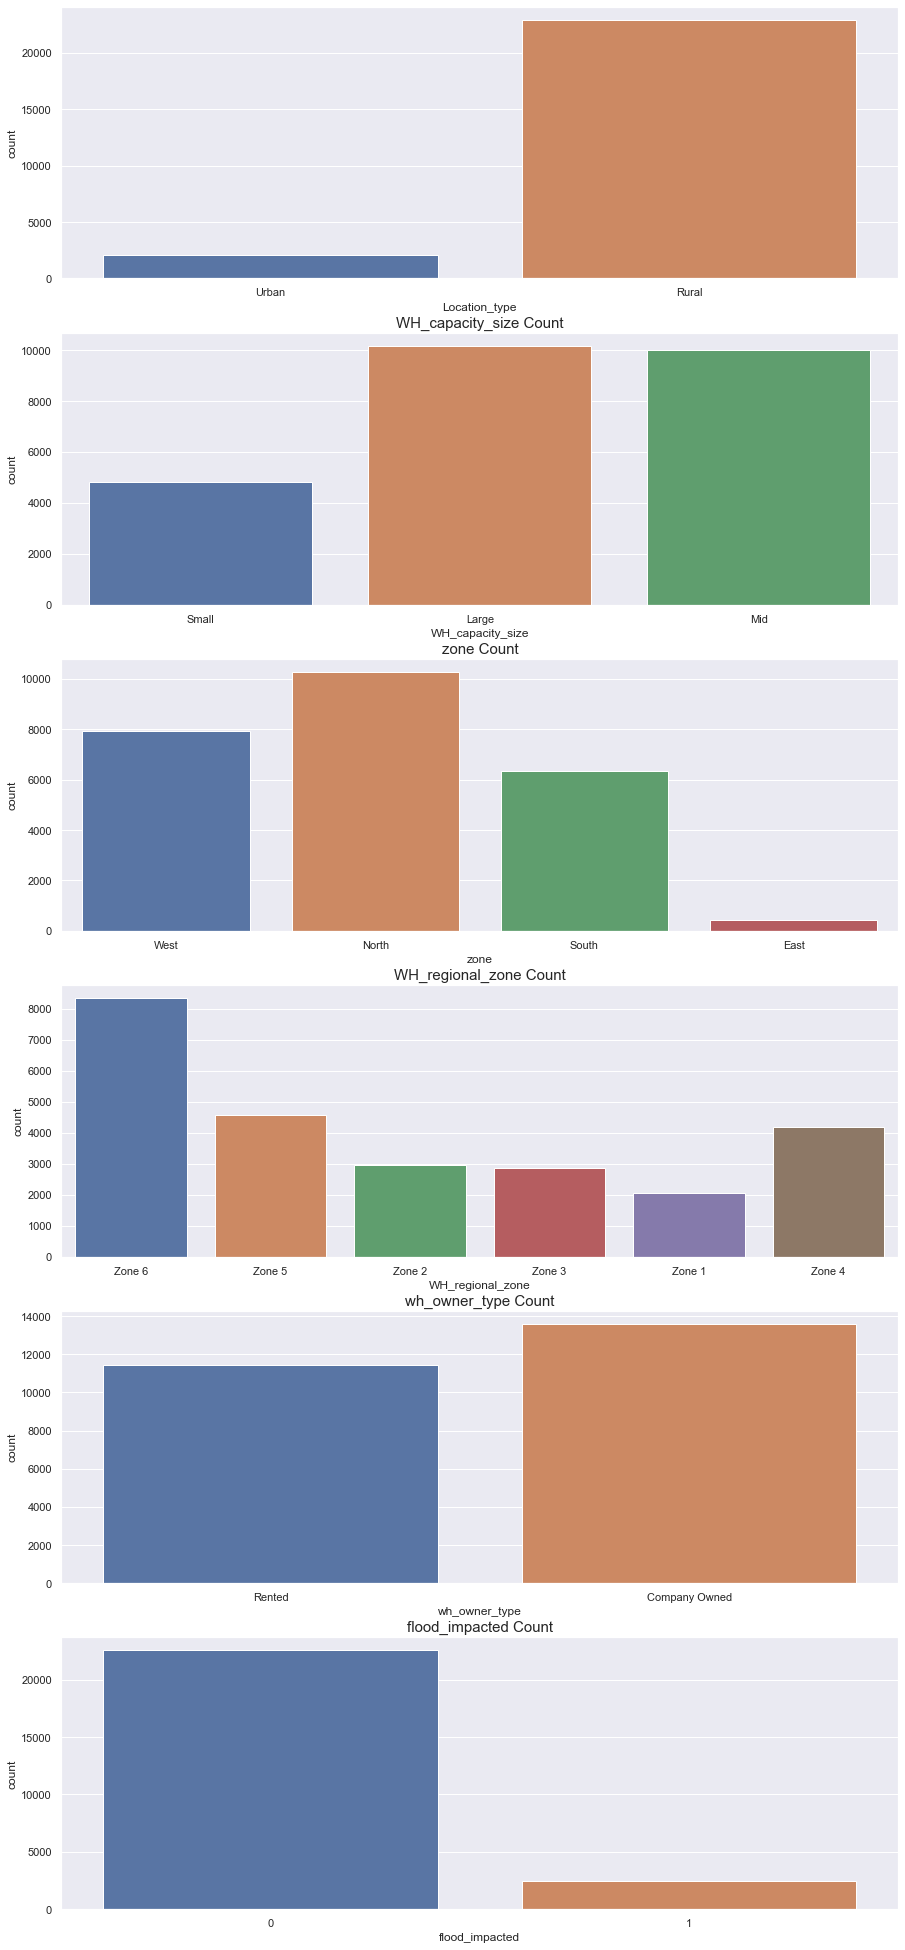

In [25]:
fig, axes = plt.subplots(nrows=6,ncols=1)
fig.set_size_inches(15,35)
sns.countplot(df['Location_type'], ax=axes[0])
a.set_title("Location_type Count",fontsize=15)

a = sns.countplot(df['WH_capacity_size'], ax=axes[1])
a.set_title("WH_capacity_size Count",fontsize=15)

a = sns.countplot(df['zone'] , ax=axes[2])
a.set_title('zone Count',fontsize=15)

a = sns.countplot(df['WH_regional_zone'] , ax=axes[3])
a.set_title("WH_regional_zone Count",fontsize=15)

a = sns.countplot(df['wh_owner_type'], ax=axes[4])
a.set_title("wh_owner_type Count",fontsize=15)

a = sns.countplot(df['flood_impacted'] , ax=axes[5])
a.set_title("flood_impacted Count",fontsize=15)

plt.show();

<AxesSubplot:>

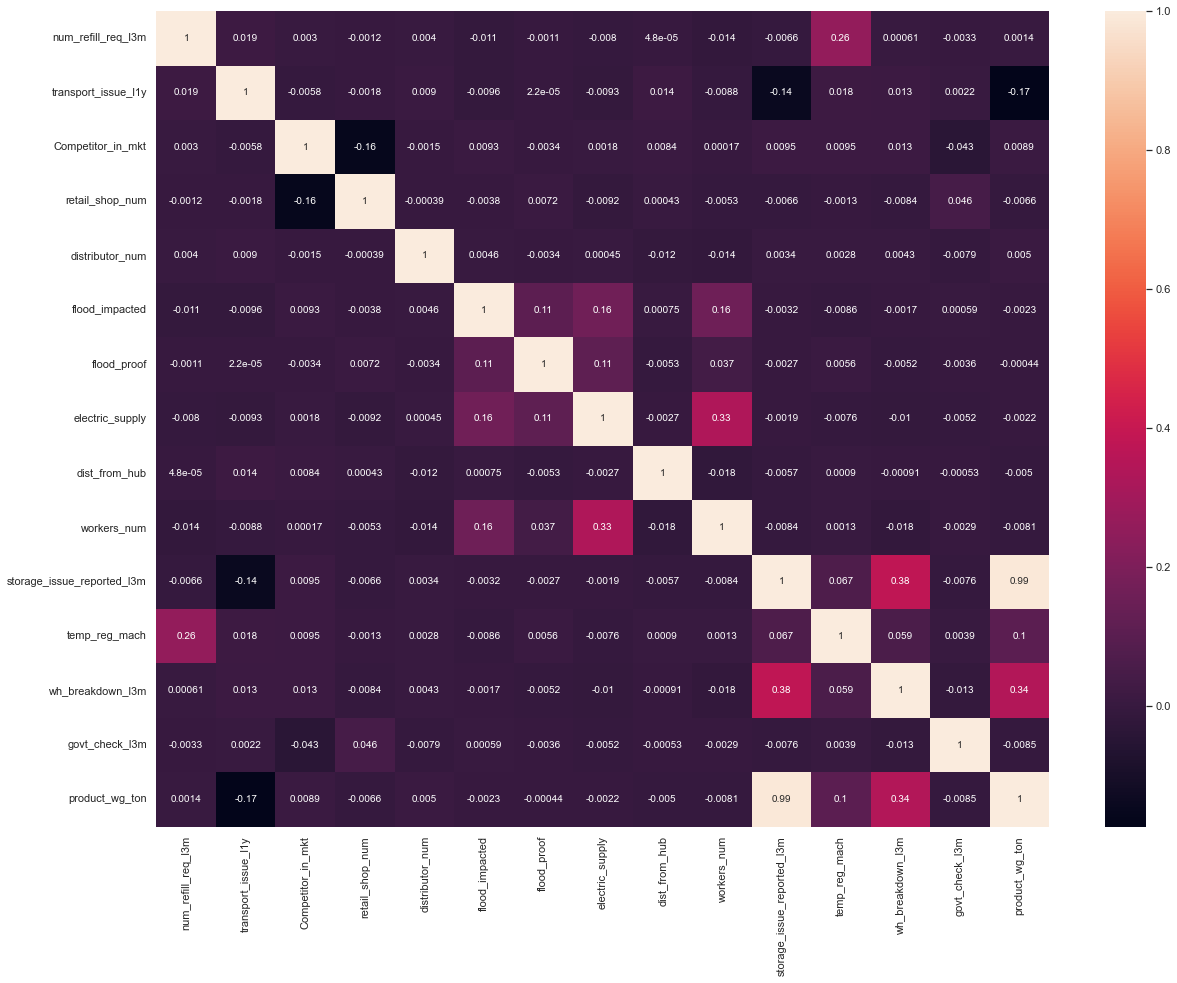

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

In [28]:
df = pd.get_dummies(df, columns=['Location_type','WH_capacity_size','zone', 'WH_regional_zone', 'wh_owner_type','approved_wh_govt_certificate'], drop_first=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   num_refill_req_l3m               25000 non-null  int64  
 1   transport_issue_l1y              25000 non-null  int64  
 2   Competitor_in_mkt                25000 non-null  int64  
 3   retail_shop_num                  25000 non-null  int64  
 4   distributor_num                  25000 non-null  int64  
 5   flood_impacted                   25000 non-null  int64  
 6   flood_proof                      25000 non-null  int64  
 7   electric_supply                  25000 non-null  int64  
 8   dist_from_hub                    25000 non-null  int64  
 9   workers_num                      25000 non-null  float64
 10  storage_issue_reported_l3m       25000 non-null  int64  
 11  temp_reg_mach                    25000 non-null  int64  
 12  wh_breakdown_l3m  

In [30]:
df.columns = df.columns.str.replace(' ', '_')

In [31]:
df.columns = df.columns.str.replace('+', '_positive')

C:\Users\Sumit\AppData\Local\Temp/ipykernel_11700/1664746658.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('+', '_positive')


In [32]:
df.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone_2,WH_regional_zone_Zone_3,WH_regional_zone_Zone_4,WH_regional_zone_Zone_5,WH_regional_zone_Zone_6,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A_positive,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B_positive,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,17115,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,5074,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,23137,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,22115,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,24071,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [33]:
# Copy all the predictor variables into X dataframe
X = df.drop('product_wg_ton', axis=1)

# Copy target into the y dataframe. 
y = df[['product_wg_ton']]

In [34]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [35]:
X.head()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,Location_type_Urban,WH_capacity_size_Mid,WH_capacity_size_Small,zone_North,zone_South,zone_West,WH_regional_zone_Zone_2,WH_regional_zone_Zone_3,WH_regional_zone_Zone_4,WH_regional_zone_Zone_5,WH_regional_zone_Zone_6,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A_positive,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B_positive,approved_wh_govt_certificate_C
0,3,1,2,4651,24,0,1,1,91,29.0,13,0,5,15,1,0,1,0,0,1,0,0,0,0,1,1,1,0,0,0,0
1,0,0,4,6217,47,0,0,1,210,31.0,4,0,3,17,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,0,4,4306,64,0,0,0,161,37.0,17,0,6,22,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
3,7,4,2,6000,50,0,0,0,103,21.0,17,1,3,27,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
4,3,1,2,4740,42,1,0,1,112,25.0,18,0,6,24,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [38]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_m=LinearRegression()
regression_m=regression_m.fit(X_train,y_train)

In [39]:
regression_m.coef_

array([[ 1.45566859e+01, -2.48313616e+02, -5.36350734e+00,
        -2.60460929e-03,  7.82950667e-01,  7.19021205e+00,
        -9.20167774e-01, -1.61208436e+01,  9.44057752e-02,
         1.50274359e+00,  1.28569927e+03,  6.31694977e+02,
        -4.08023913e+01,  1.25373909e+00, -4.25848506e+01,
        -7.06400838e+00,  3.30068701e+01,  1.00491206e+01,
         1.51846792e+00,  3.94139497e+01,  1.50201586e+01,
        -3.39000784e+01,  1.18159114e+01, -1.05487282e+01,
         6.19317497e-01,  2.83921752e+01, -4.74409721e+03,
        -4.61565472e+03, -6.78891690e+03, -6.83387063e+03,
        -5.00203225e+03]])

In [40]:
X_train.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
       'govt_check_l3m', 'Location_type_Urban', 'WH_capacity_size_Mid',
       'WH_capacity_size_Small', 'zone_North', 'zone_South', 'zone_West',
       'WH_regional_zone_Zone_2', 'WH_regional_zone_Zone_3',
       'WH_regional_zone_Zone_4', 'WH_regional_zone_Zone_5',
       'WH_regional_zone_Zone_6', 'wh_owner_type_Rented',
       'approved_wh_govt_certificate_A',
       'approved_wh_govt_certificate_A_positive',
       'approved_wh_govt_certificate_B',
       'approved_wh_govt_certificate_B_positive',
       'approved_wh_govt_certificate_C'],
      dtype='object')

In [41]:
# R square on training data
regression_m.score(X_train, y_train)

0.9901101110050522

In [42]:
# R square on testing data
regression_m.score(X_test, y_test)

0.9905731926250413

In [43]:
#RMSE on Training data
predicted_train= regression_m.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

1157.6691274890734

In [44]:
#RMSE on Testing data
predicted_test= regression_m.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

1117.1073041976822

In [45]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.247e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:32:11   Log-Likelihood:            -1.5887e+05
No. Observations:               18750   AIC:                         3.178e+05
Df Residuals:                   18719   BIC:                         3.180e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [46]:
from scipy.stats import zscore
X_train_scaled = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [47]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [48]:
for idx, col_name in enumerate(X_train.columns):
    print('The coefficient for {} is {}'.format(col_name,regression_model.coef_[0][idx]))

The coefficient for num_refill_req_l3m is 0.003242998629526418
The coefficient for transport_issue_l1y is -0.02562689245529489
The coefficient for Competitor_in_mkt is -0.0005408666133249226
The coefficient for retail_shop_num is -0.0002428193726519865
The coefficient for distributor_num is 0.0010827720600072813
The coefficient for flood_impacted is 0.000169806831848479
The coefficient for flood_proof is -2.5040530557584307e-05
The coefficient for electric_supply is -0.0006556740956359815
The coefficient for dist_from_hub is 0.0005151967222404847
The coefficient for workers_num is 0.000984099610453655
The coefficient for storage_issue_reported_l3m is 1.0147769727865912
The coefficient for temp_reg_mach is 0.024994927825006848
The coefficient for wh_breakdown_l3m is -0.005916495673233559
The coefficient for govt_check_l3m is 0.0009436535706196505
The coefficient for Location_type_Urban is -0.0010026556991513428
The coefficient for WH_capacity_size_Mid is -73136237976.14452
The coefficie

In [49]:
# R square on traing data
regression_model.score(X_train_scaled, y_train_scaled)

0.9901100971691108

In [50]:
print(model.rsquared_adj)

0.990094260977281


In [51]:
# R square on testing data
regression_model.score(X_test_scaled, y_test_scaled)

-9.214580011379658e+17

In [52]:
# concatenate X and y into a single dataframe
data_train_scaled = pd.concat([X_train_scaled, y_train_scaled], axis=1)

In [55]:
expr= 'product_wg_ton ~ num_refill_req_l3m + transport_issue_l1y + Competitor_in_mkt + retail_shop_num + distributor_num + flood_impacted + flood_proof + electric_supply + dist_from_hub + workers_num + storage_issue_reported_l3m + temp_reg_mach + wh_breakdown_l3m + govt_check_l3m + Location_type_Urban + WH_capacity_size_Mid + WH_capacity_size_Small + zone_North + zone_South + zone_West + WH_regional_zone_Zone_2 + WH_regional_zone_Zone_3 + WH_regional_zone_Zone_4 + WH_regional_zone_Zone_5 + WH_regional_zone_Zone_6 + wh_owner_type_Rented + approved_wh_govt_certificate_A + approved_wh_govt_certificate_A_positive + approved_wh_govt_certificate_B + approved_wh_govt_certificate_B_positive + approved_wh_govt_certificate_C'

In [56]:
import statsmodels.formula.api as smf
lm1=smf.ols(formula = expr, data=data_train_scaled).fit()
lm1.params

Intercept                                 -2.070826e-16
num_refill_req_l3m                         3.261489e-03
transport_issue_l1y                       -2.562468e-02
Competitor_in_mkt                         -5.239559e-04
retail_shop_num                           -2.347349e-04
distributor_num                            1.081096e-03
flood_impacted                             1.816420e-04
flood_proof                               -1.781990e-05
electric_supply                           -6.574169e-04
dist_from_hub                              5.088285e-04
workers_num                                9.919077e-04
storage_issue_reported_l3m                 1.014767e+00
temp_reg_mach                              2.499649e-02
wh_breakdown_l3m                          -5.929654e-03
govt_check_l3m                             9.308111e-04
Location_type_Urban                       -1.001744e-03
WH_capacity_size_Mid                      -1.916062e-04
WH_capacity_size_Small                     1.116

In [57]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 6.247e+04
Date:                Fri, 06 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:35:36   Log-Likelihood:                 16672.
No. Observations:               18750   AIC:                        -3.328e+04
Df Residuals:                   18719   BIC:                        -3.304e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [58]:
mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [59]:
import math

math.sqrt(mse)

959926039.4103107

In [60]:
y_pred = regression_model.predict(X_test_scaled)

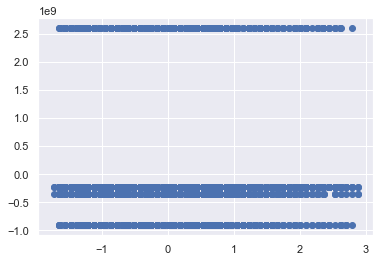

In [62]:
plt.scatter(y_test_scaled['product_wg_ton'], y_pred)

In [63]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (0.0) * num_refill_req_l3m + (-0.03) * transport_issue_l1y + (-0.0) * Competitor_in_mkt + (-0.0) * retail_shop_num + (0.0) * distributor_num + (0.0) * flood_impacted + (-0.0) * flood_proof + (-0.0) * electric_supply + (0.0) * dist_from_hub + (0.0) * workers_num + (1.01) * storage_issue_reported_l3m + (0.02) * temp_reg_mach + (-0.01) * wh_breakdown_l3m + (0.0) * govt_check_l3m + (-0.0) * Location_type_Urban + (-0.0) * WH_capacity_size_Mid + (0.0) * WH_capacity_size_Small + (0.0) * zone_North + (0.0) * zone_South + (0.0) * zone_West + (0.0) * WH_regional_zone_Zone_2 + (-0.0) * WH_regional_zone_Zone_3 + (0.0) * WH_regional_zone_Zone_4 + (-0.0) * WH_regional_zone_Zone_5 + (0.0) * WH_regional_zone_Zone_6 + (0.0) * wh_owner_type_Rented + (-0.16) * approved_wh_govt_certificate_A + (-0.15) * approved_wh_govt_certificate_A_positive + (-0.23) * approved_wh_govt_certificate_B + (-0.23) * approved_wh_govt_certificate_B_positive + (-0.18) * approved_wh_govt_certificate_C + 

In [64]:
from sklearn.tree import DecisionTreeRegressor

In [65]:
DT_model = DecisionTreeRegressor(random_state=44)
DT_model = DT_model.fit(X_train,y_train)

In [66]:
DT_model.score(X_train, y_train)

1.0

In [67]:
DT_model.score(X_test, y_test)

0.9873928098673397

In [68]:
#RMSE on Training data
predicted_train= DT_model.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.0

In [69]:
#RMSE on Testing data
predicted_test= DT_model.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

1291.8786657577407

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
RFregressor = RandomForestRegressor(n_estimators = 10, random_state = 40)
RFregressor = DT_model.fit(X_train,y_train)

In [72]:
RFregressor.score(X_train, y_train)

1.0

In [73]:
RFregressor.score(X_test, y_test)

0.9873928098673397

In [74]:
#RMSE on Training data
predicted_train= RFregressor.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

0.0

In [75]:
#RMSE on Testing data
predicted_test= RFregressor.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

1291.8786657577407

In [76]:
from sklearn.svm import SVR

In [77]:
SVregressor = SVR(kernel = 'rbf')
SVregressor = SVregressor.fit(X_train,y_train)

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
SVregressor.score(X_train, y_train)

1.0217470052142907e-05

In [79]:
SVregressor.score(X_test, y_test)

-0.00011261708434284756

In [80]:
#RMSE on Training data
predicted_train= SVregressor.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

11640.899089595798

In [81]:
#RMSE on Testing data
predicted_test= SVregressor.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, predicted_test))

11506.335371358984

In [82]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [83]:
GBR = GradientBoostingRegressor()
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [84]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

C:\Users\Sumit\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8, 10],
                         'n_estimators': [100, 500, 1000, 1500],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [85]:
print(" Results from Grid Search " )
print()
print("\n The best estimator across ALL searched params:\n",
          grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",
          grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",
          grid_GBR.best_params_)

 Results from Grid Search 


 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=1000,
                          subsample=0.9)

 The best score across ALL searched params:
 0.993436988103666

 The best parameters across ALL searched params:
 {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.9}


In [86]:
#RMSE on Training data
predicted_train= grid_GBR.predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train, predicted_train))

903.812218573716

In [87]:
grid_GBR.score(X_train,y_train)

0.9939719210728387

In [88]:
grid_GBR.score(X_test,y_test)

0.9941026666620066